In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('copy_data.csv')
data.head()

,Unnamed: 0,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df = data.values
df.shape

(227, 18)

In [5]:
norm = np.linalg.norm(df)
normal_array = df/norm
#print(normal_array)

In [6]:
A = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
A

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.61913212,
        -0.32114937, -1.15881848],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.57341694,
        -0.71214481,  0.08579033],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.35218232,
         2.38574214, -1.67167236],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.11195045,
         1.42329182, -1.07751238],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.48862922,
         0.05480778, -0.47709808],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.19893785,
        -0.29859194,  0.08579033]])

In [7]:
cov_matrix = np.cov(A.T)
cov_matrix

array([[ 1.00442478e+00,  4.72064664e-01, -2.83152108e-02,
        -6.85007021e-02,  1.09161732e-05,  2.30957216e-02,
        -3.94933424e-02, -4.35677664e-02, -3.09396277e-02,
         1.89033802e-01, -6.10095904e-02, -1.21108290e-01,
        -2.65559351e-02, -4.52749398e-02, -2.84789588e-02,
         3.76425038e-04,  9.95470874e-02, -8.10382961e-02],
       [ 4.72064664e-01,  1.00442478e+00, -6.72130913e-02,
        -9.60506155e-02,  4.76522550e-02, -7.19101610e-03,
         7.24988603e-02,  3.59421659e-02,  5.35957236e-02,
        -8.00263519e-02, -1.44480775e-01,  1.39518889e-01,
        -8.24910722e-02, -6.66829932e-02,  4.02259996e-02,
        -5.06025506e-02,  1.21442370e-01, -5.43188123e-02],
       [-2.83152108e-02, -6.72130913e-02,  1.00442478e+00,
         2.42758942e-01,  1.78777541e-01, -1.44837657e-01,
         1.96616682e-01,  9.54764819e-02,  2.81318248e-01,
        -8.13574184e-02, -3.17952778e-02,  8.22057196e-02,
         6.86068504e-03, -1.59854479e-01, -7.03316040e

In [8]:
eig, vec = np.linalg.eig(cov_matrix)
eig = eig / sum(eig)
eig

array([2.98058440e-01, 1.37774554e-01, 1.03073258e-01, 8.72090594e-02,
       7.31508712e-02, 5.60707698e-02, 4.92196201e-02, 3.90687968e-02,
       3.34161239e-02, 3.00189327e-02, 2.62659607e-02, 2.08042406e-02,
       2.29303306e-02, 1.04532169e-02, 4.73183218e-03, 7.61705383e-03,
       1.36932365e-04, 6.76530330e-09])

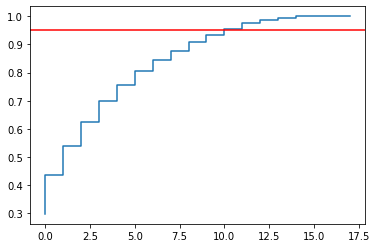

In [9]:
cumsum = np.cumsum(eig)
plt.step(range(len(cumsum)), cumsum)
plt.axhline(y=.95, c='r')

In [10]:
k_eigenvectors = np.array(vec)[:,0:12]
#print(k_eigenvectors)

In [11]:
x_new = A @ k_eigenvectors
print(x_new)

[[ 5.25925486 -2.32668288  0.05269276 ... -0.11282686  0.08128107
  -0.40213837]
 [-0.26077738  1.49196389 -0.05859405 ... -0.11990162  0.01317194
   0.39669436]
 [ 1.15464818 -1.90462841 -1.09460681 ...  0.21766829 -0.65634806
   0.69914356]
 ...
 [ 3.01204107 -1.58661111  0.09563336 ...  0.40759816  0.46766022
   0.79720603]
 [ 2.89829263 -0.88519646 -0.09077145 ... -0.17668723  0.17437388
  -0.57612503]
 [ 1.74859712 -0.69363114 -0.06930097 ... -0.0424718  -0.03652257
  -1.12624011]]


In [12]:
k_eigenvectors.shape

(18, 12)

In [13]:
A.shape

(227, 18)

# DBScan

In [14]:
z = StandardScaler()
df = z.fit_transform(df)

In [15]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(df)
clustering.labels_

array([-1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  3,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        4,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [16]:
set(clustering.labels_)

{-1, 0, 1, 2, 3, 4}

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(df, clustering.labels_)

0.14203688746834134

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


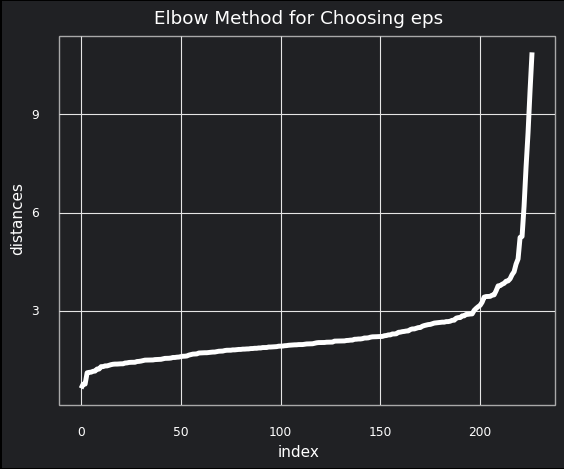

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


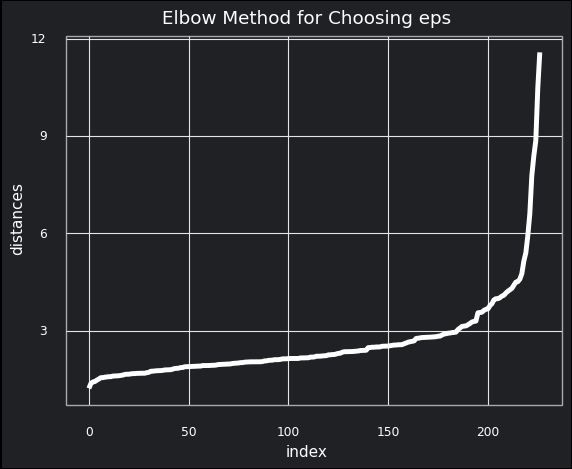

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


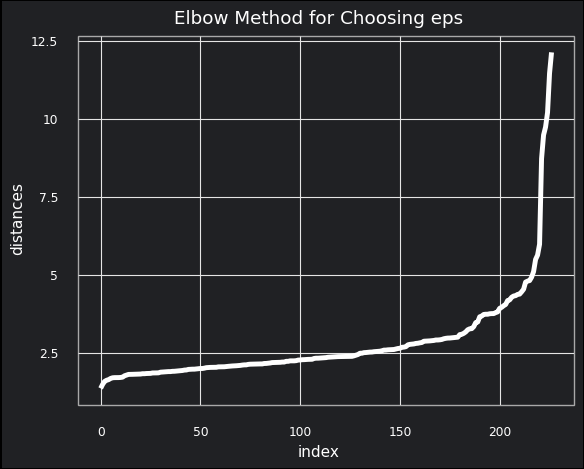

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


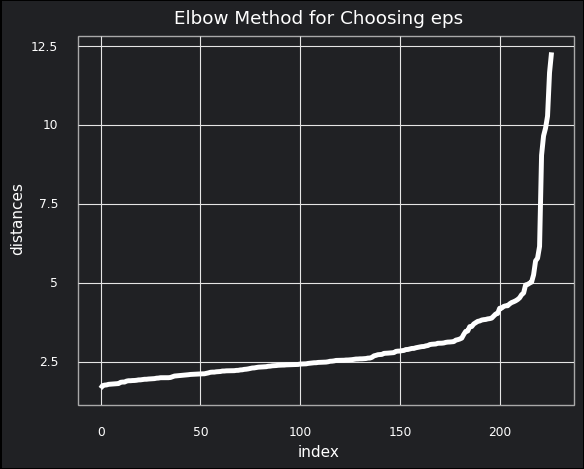

In [18]:
#plot the distances
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
for mins in [2,4,6,8]:
    nn = NearestNeighbors(mins + 1)

    nn.fit(df)

    distances, neighbors = nn.kneighbors(df)

    # sort the distances
    distances = np.sort(distances[:, mins], axis = 0)

    distances_df = pd.DataFrame({"distances": distances,
                                 "index": list(range(0,len(distances)))})
    plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
     geom_line(color = "white", size = 2) + theme_minimal() +
     labs(title = "Elbow Method for Choosing eps") +
     theme(panel_grid_minor = element_blank(),
          rect = element_rect(fill = "#202124ff"),
          axis_text = element_text(color = "white"),
          axis_title = element_text(color = "white"),
          plot_title = element_text(color = "white"),
          panel_border = element_line(color = "darkgray"),
          plot_background = element_rect(fill = "#202124ff")
          ))
    #ggsave(plot=plt, filename='elbow.png', dpi=300)

    print(plt)

In [19]:
l = {(2,3.5), (4,4.5), (6,4.8), (8,5)}
for i in l:
    print(i)
    min_points = i[0]
    epsilon = i[1]
    clustering = DBSCAN(eps=epsilon, min_samples=min_points).fit(df)
    print(silhouette_score(df, clustering.labels_))    
    print(set(clustering.labels_))

(6, 4.8)
0.5469354338877777
{0, -1}
(4, 4.5)
0.5274571082926794
{0, -1}
(2, 3.5)
0.1674427300793248
{0, 1, 2, 3, -1}
(8, 5)
0.5469354338877777
{0, -1}


we choose min_samples of 2 and epsilon of 3.5

### Using PCA 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


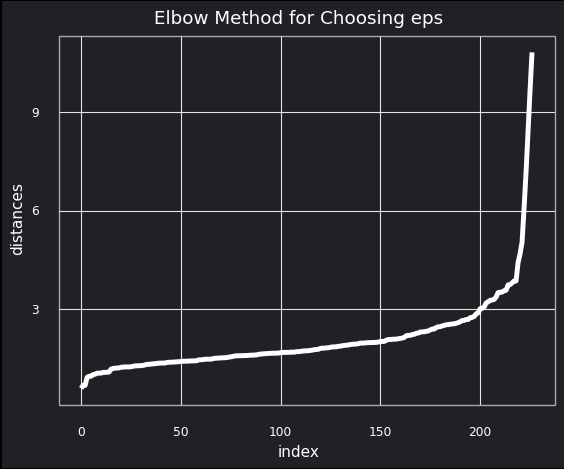

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


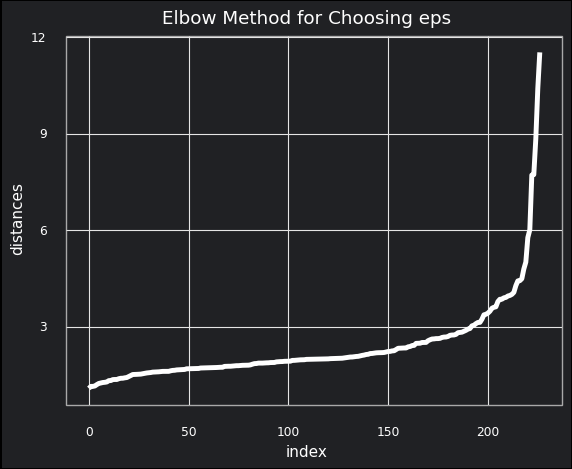

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


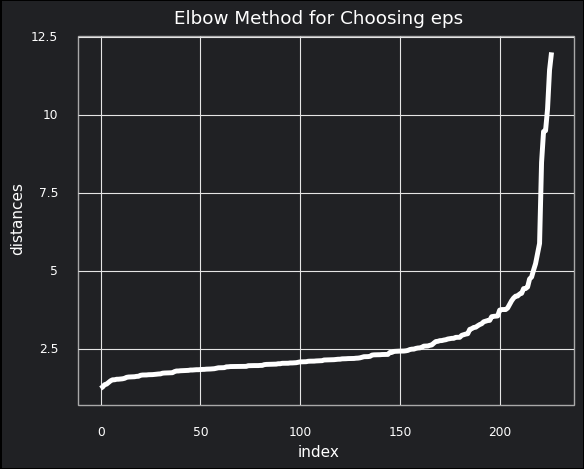

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_neighbors=9 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


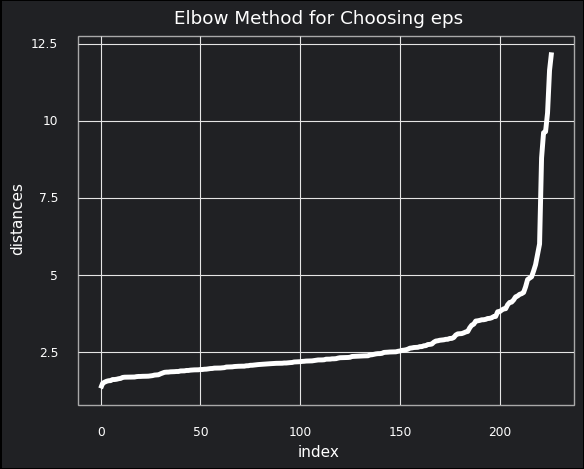

In [20]:
#plot the distances
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
for mins in [2,4,6,8]:
    nn = NearestNeighbors(mins + 1)

    nn.fit(x_new)

    distances, neighbors = nn.kneighbors(x_new)

    # sort the distances
    distances = np.sort(distances[:, mins], axis = 0)

    distances_df = pd.DataFrame({"distances": distances,
                                 "index": list(range(0,len(distances)))})
    plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
     geom_line(color = "white", size = 2) + theme_minimal() +
     labs(title = "Elbow Method for Choosing eps") +
     theme(panel_grid_minor = element_blank(),
          rect = element_rect(fill = "#202124ff"),
          axis_text = element_text(color = "white"),
          axis_title = element_text(color = "white"),
          plot_title = element_text(color = "white"),
          panel_border = element_line(color = "darkgray"),
          plot_background = element_rect(fill = "#202124ff")
          ))
    #ggsave(plot=plt, filename='elbow.png', dpi=300)

    print(plt)

In [21]:
l = {(2,3.8), (4,4.3), (6,4.5), (8,4.8)}
for i in l:
    print(i)
    min_points = i[0]
    epsilon = i[1]
    clustering = DBSCAN(eps=epsilon, min_samples=min_points).fit(x_new)
    print(silhouette_score(x_new, clustering.labels_)) 
    print(set(clustering.labels_))

(6, 4.5)
0.537913418721546
{0, -1}
(4, 4.3)
0.5573008343984102
{0, -1}
(2, 3.8)
0.28943683721702057
{0, 1, -1}
(8, 4.8)
0.537913418721546
{0, -1}


In [22]:
clustering = DBSCAN(eps=3.8, min_samples=2).fit(x_new)
print(silhouette_score(x_new, clustering.labels_)) 
clustering.labels_  

0.28943683721702057


array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

finally we see that using PCA and choosing 2 min_samples with 3.8 epsilon will give more score